In [81]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
import astropy.units as u

In [67]:
fp = '/Users/josh/projects/misc/phangs_sample_table_v1p6.fits'
tab = fits.open(fp)

In [126]:
dist  = tab[1].data.dist[111]*u.Mpc

In [68]:
np.where(tab[1].data.name == 'ngc6300')
l_sl = tab[1].data.size_scalelength[111]

In [138]:
r_gal = np.linspace(0.1,l_sl, 10**5)
l_sl

37.662437

In [139]:
I_CO = np.exp(r_gal/l_sl)

In [140]:
I_CO

array([1.00265869, 1.00266869, 1.00267869, ..., 2.71822761, 2.71825472,
       2.71828183])

In [141]:
norm = np.linalg.norm(I_CO)

I_CO = I_CO/norm


In [144]:
np.sum(I_CO)

304.07210965792

In [253]:
mask_loc = '/Users/josh/projects/misc/ngc6300_2dcoverage.fits'
mask = fits.open(mask_loc)

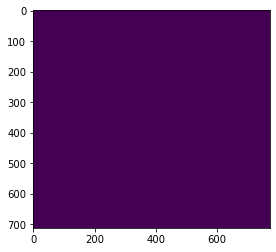

In [254]:
plt.imshow(mask[0].data)

In [258]:
mask[0].data[8]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [220]:
cen = (386,386)

387.0

In [222]:
w = WCS(mask[0].header)
sky = w.pixel_to_world(386, 386)
sky.ra
pix1 = (386,387)

In [223]:
sky2 = w.pixel_to_world(pix1[0],pix1[1])
pix_sep = np.sqrt((cen[0]-pix1[0])**2 + (cen[1]-pix1[1])**2)

In [224]:
pix_sep

1.0

In [225]:
c = SkyCoord(ra=sky.ra, dec=sky.dec, distance = dist)

In [226]:
c2 = SkyCoord(ra=sky2.ra, dec=sky2.dec, distance = dist)

In [232]:
pix_dif = c.separation_3d(c2).to(u.kpc)
grid = [np.zeros(388),np.zeros(388)]
gridx = np.zeros(387)
gridy = np.zeros(387)

In [245]:
x,y = np.linspace(0,386,387),np.linspace(0,386,387)


i = 0
while i < len(x):
    k = 0
    while k < len(y):
        r = np.sqrt((cen[0] - x[i])**2 + (cen[1] - y[k])**2)
        r_dist = r*pix_dif/u.kpc
        I_CO = np.exp(r_dist/l_sl)
        grid[int(x[i])][int(y[k])] = I_CO
        k+=1
    i+=1


IndexError: list index out of range

In [248]:
grid

[array([1.27649405, 1.27609073, 1.27568807, 1.27528605, 1.27488469,
        1.27448399, 1.27408394, 1.27368456, 1.27328584, 1.27288777,
        1.27249038, 1.27209364, 1.27169758, 1.27130219, 1.27090746,
        1.27051341, 1.27012003, 1.26972732, 1.2693353 , 1.26894395,
        1.26855328, 1.26816329, 1.26777399, 1.26738537, 1.26699744,
        1.2666102 , 1.26622364, 1.26583778, 1.26545261, 1.26506814,
        1.26468436, 1.26430128, 1.2639189 , 1.26353722, 1.26315625,
        1.26277598, 1.26239641, 1.26201756, 1.26163942, 1.26126198,
        1.26088527, 1.26050926, 1.26013398, 1.25975941, 1.25938557,
        1.25901244, 1.25864004, 1.25826837, 1.25789743, 1.25752721,
        1.25715773, 1.25678898, 1.25642096, 1.25605368, 1.25568715,
        1.25532135, 1.25495629, 1.25459198, 1.25422842, 1.2538656 ,
        1.25350353, 1.25314222, 1.25278166, 1.25242185, 1.2520628 ,
        1.25170452, 1.25134699, 1.25099023, 1.25063423, 1.250279  ,
        1.24992454, 1.24957085, 1.24921793, 1.24

In [247]:
r_dist = r*pix_dif
i
k

0

In [186]:
r_dist = r_dist/u.kpc

In [187]:
I_CO = np.exp(r_dist/l_sl)

In [188]:
norm = np.linalg.norm(I_CO)

I_CO = I_CO/norm

In [249]:
mask[0].data = grid

In [252]:
len(grid)

2

In [260]:
from phangs import PhangsGalaxy
import scipy.stats as ss
from astropy.io import fits
import numpy as np
import astropy.units as u
from scipy.interpolate import interp1d

In [267]:

gal = PhangsGalaxy('ngc6300')
#
hdu = fits.open('/Users/josh/projects/misc/ngc6300_12m+7m+tp_co21_150pc_strict_mom0.fits')
# Build map of radius on the sky
radius = gal.radius(header=hdu[0].header).to(u.kpc).value
# Calculate mean in 0.5 kpc bins
mn, center, _ = ss.binned_statistic(radius.ravel(), np.nan_to_num(hdu[0].data).ravel(),bins=np.arange(0,20,0.5), statistic='mean')
# Calculate centres of bins
rmid = (center[0:-1] + center[1:]) * 0.5
# Generate an interpolation function
f = interp1d(rmid, mn, bounds_error=False)
# Evaluate that function for the radius map
azav = f(radius)

In [283]:
np.nanmax(mask[0].data)

81.1029209538087

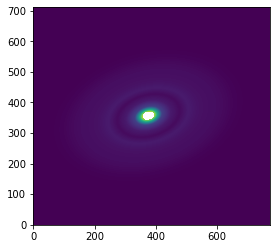

In [280]:
mask[0].data = azav
plt.imshow(mask[0].data, origin='lower')

In [279]:
mask[0].writeto('/Users/josh/projects/misc/ngc6300_m0_mask.fits')

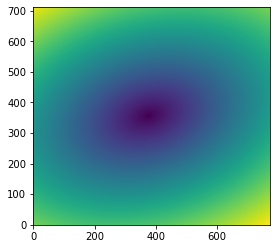

In [282]:
plt.imshow(radius, origin='lower')